In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

import bin_utils_devo as ut
import bin_model_env as me
import tab_agents as tab

In [95]:
fnames=[
    # First worm
    'Data/traj12-11-2020_19-04-41.pkl', #none
    'Data/traj12-11-2020_19-14-38.pkl', #none
    'Data/traj12-11-2020_19-24-30.pkl', #xlim 800
    'Data/traj12-11-2020_19-35-31.pkl', #none # Seems like an especially bad dataset. Actually ruined all the others

    # Second worm
    'Data/traj12-11-2020_19-55-19.pkl', #none
    'Data/traj12-11-2020_20-05-11.pkl', #none
    'Data/traj12-11-2020_20-15-17.pkl', #none
    'Data/traj12-11-2020_20-25-06.pkl', #xlim 1430

    # Third worm
    'Data/traj30-10-2020_18-14-00.pkl', #none
    'Data/traj30-10-2020_18-34-10.pkl', #none

    # Fourth worm
    'Data/traj02-11-2020_15-53-56.pkl', #none 
    'Data/traj02-11-2020_16-14-45.pkl', #none 

    # Fifth worm
    'Data/traj03-11-2020_14-46-45.pkl', #none
    'Data/traj03-11-2020_15-08-07.pkl', #none
]

xlims = [1e6, 1e6, 800, 1e6, 1e6, 1e6, 1e6, 1430, 1e6, 1e6, 1e6, 1e6, 1e6, 1e6]

traj_df = ut.make_df(fnames,xlimit=xlims,time_ahead=10,time_steps=6)

In [65]:
traj_df.to_pickle('./traj_df.pkl')

In [2]:
traj_df = pd.read_pickle('./traj_df.pkl')

In [9]:
def true_policy(prod):
    if prod<0:
        action = 1
    else:
        action = 0
    return action
def on_policy(prod):
    return 1
def worst_policy(prod):
    if prod<0:
        action = 0
    else:
        action = 1
    return action
def off_policy(prod):
    return 0

def test_policy_dropout(policy,traj_df, samples=1000, episodes=100):
    steps_per_ep = 100
    rews = []
    
    for ep in range(episodes):
        samp_df = traj_df.sample(n=samples)
        dist_dict = ut.make_dist_dict(samp_df)
        worm = me.FakeWorm(dist_dict)
        
        rew = np.zeros(steps_per_ep)
        action = 0
        for i in range(steps_per_ep):
            ob,rew[i],done,info = worm.step(action)
            obs = worm.obs2grid(ob)
            prod = np.sign(obs[0]*obs[1])
            action = policy(prod)
        rews.append(np.mean(rew))
        
    rews = np.array(rews)
    print(np.mean(rews),np.std(rews))
    return rews

In [ ]:
# 2000 samples
# Below are all bin, z=3

In [8]:
true_pol = test_policy_dropout(true_policy,traj_df)
print('True done')
worst_pol = test_policy_dropout(worst_policy,traj_df)
print('Worst done')
on_pol = test_policy_dropout(on_policy,traj_df)
print('On done')
off_pol = test_policy_dropout(off_policy,traj_df)
print('Off done')

0
10
20
30
40
50
60
70
80
90
6.042541112928417 1.9041613244557687
True done
0
10
20
30
40
50
60
70
80
90
3.0211006681696584 3.0311922084586076
Worst done
0
10
20
30
40
50
60
70
80
90
3.1896450780350496 3.304528004544918
On done
0
10
20
30
40
50
60
70
80
90
5.374239547207667 1.8628283834266515
Off done


In [10]:
# 1000 samples
true_pol = test_policy_dropout(true_policy,traj_df)
print('True done')
worst_pol = test_policy_dropout(worst_policy,traj_df)
print('Worst done')
on_pol = test_policy_dropout(on_policy,traj_df)
print('On done')
off_pol = test_policy_dropout(off_policy,traj_df)
print('Off done')

5.405479699099299 2.015660607497195
True done
2.4836179113465313 2.7403392065563343
Worst done
2.243849938228079 3.9582591255627566
On done
4.438394528196024 2.1443777727404028
Off done


In [6]:
# 1000 samples. Same, just a rerun
true_pol = test_policy_dropout(true_policy,traj_df)
print('True done')
off_pol = test_policy_dropout(off_policy,traj_df)
print('Off done')
worst_pol = test_policy_dropout(worst_policy,traj_df)
print('Worst done')
on_pol = test_policy_dropout(on_policy,traj_df)
print('On done')

5.371751481042611 1.8494832404144363
True done
4.52411454435152 2.0866638688563754
Off done
3.1130020342930216 3.0303039041139566
Worst done
3.190743648182358 3.1541565648161267
On done


In [ ]:
# No bin

In [10]:
# 2000 samples
true_pol = test_policy_dropout(true_policy,traj_df,samples=2000)
print('True done')
off_pol = test_policy_dropout(off_policy,traj_df,samples=2000)
print('Off done')
worst_pol = test_policy_dropout(worst_policy,traj_df,samples=2000)
print('Worst done')
on_pol = test_policy_dropout(on_policy,traj_df,samples=2000)
print('On done')

1.6553633600842728 2.012376155227547
True done
0.2598434739811964 1.875292041066541
Off done
1.1526635444925155 1.8841857667857427
Worst done
2.0040105397247654 2.04286585122924
On done


In [11]:
# 1000 samples
true_pol = test_policy_dropout(true_policy,traj_df)
print('True done')
off_pol = test_policy_dropout(off_policy,traj_df)
print('Off done')
worst_pol = test_policy_dropout(worst_policy,traj_df)
print('Worst done')
on_pol = test_policy_dropout(on_policy,traj_df)
print('On done')

1.8279467006941799 2.025155021527565
True done
0.9849856247918095 2.1312570732520473
Off done
0.899290359913914 1.8129645062937723
Worst done
1.4399232409802871 2.1470011794079658
On done


# Looking at model

In [3]:
traj_df.query('action==0 & prev_actions==0')

,obs_b,obs_h,action,next_obs_b,next_obs_h,reward,loc,prev_actions,t
1,150,150,0,150,150,-1.393939,"[848.0, 1068.3333333333333]",0.0,1.859
2,150,-60,0,150,-60,-1.444444,"[847.3333333333334, 1068.5555555555557]",0.0,2.812
3,-30,-60,0,-30,-60,0.727273,"[846.2727272727273, 1069.7272727272727]",0.0,3.734
4,-30,90,0,-30,90,0.538462,"[845.75, 1070.0]",0.0,4.687
5,-30,90,0,-30,90,-4.000000,"[848.125, 1069.0]",0.0,5.609
...,...,...,...,...,...,...,...,...,...
6809,-30,30,0,-30,30,8.992147,"[802.7722772277227, 1185.4059405940593]",0.0,85.110
6814,-60,30,0,-60,30,5.116485,"[811.7647058823529, 1166.1411764705883]",0.0,89.969
6815,-60,30,0,-60,30,4.860153,"[814.4888888888889, 1163.388888888889]",0.0,90.953
6816,-60,-30,0,-60,-30,6.990209,"[818.0493827160494, 1161.0246913580247]",0.0,91.907


In [9]:
traj_df.query('action==1 & prev_actions==3')

,obs_b,obs_h,action,next_obs_b,next_obs_h,reward,loc,prev_actions,t
0,30,60,1,30,60,-0.737374,"[848.7272727272727, 1067.8181818181818]",3.0,0.953
6,150,30,1,150,30,-3.788462,"[846.5384615384615, 1069.4615384615386]",3.0,6.531
7,-30,-150,1,-30,-150,0.222222,"[841.0, 1073.0]",3.0,7.469
8,-30,-60,1,-30,-60,-0.083333,"[841.25, 1073.25]",3.0,8.390
9,-30,-60,1,-30,-60,-0.355556,"[842.8333333333334, 1072.7777777777778]",3.0,9.281
...,...,...,...,...,...,...,...,...,...
6811,-30,60,1,-30,60,8.329456,"[805.8275862068965, 1176.4137931034484]",3.0,87.032
6812,-30,0,1,-30,0,5.778015,"[807.2929292929293, 1171.919191919192]",3.0,88.016
6813,150,-30,1,150,-30,4.695448,"[809.6265060240964, 1168.0843373493976]",3.0,88.969
6817,120,-30,1,120,-30,7.266236,"[821.0114942528736, 1158.528735632184]",3.0,92.860


In [4]:
dist_dict = ut.make_dist_dict(traj_df)

In [5]:
dist_dict.keys()

dict_keys(['obs_on_bins', 'obs_off_bins', 'body_on', 'body_off', 'head_on', 'head_off', 'reward_on', 'reward_off'])

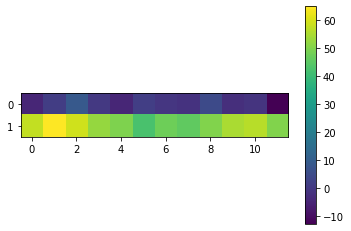

In [6]:
plt.imshow(dist_dict['body_on'].T)
plt.colorbar();

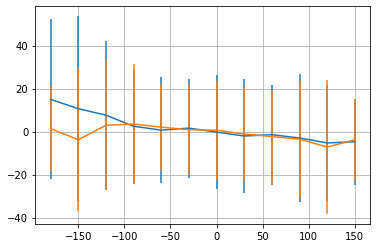

In [8]:
plt.errorbar(np.arange(-180,180,30),dist_dict['body_on'][:,0],yerr=dist_dict['body_on'][:,1])
plt.errorbar(np.arange(-180,180,30),dist_dict['body_off'][:,0],yerr=dist_dict['body_off'][:,1])
plt.grid();

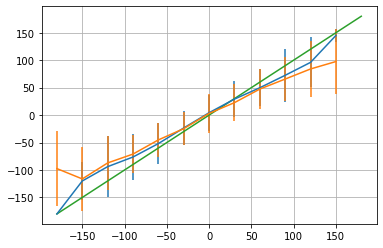

In [15]:
plt.errorbar(np.arange(-180,180,30),dist_dict['head_on'][:,0],yerr=dist_dict['head_on'][:,1])
plt.errorbar(np.arange(-180,180,30),dist_dict['head_off'][:,0],yerr=dist_dict['head_off'][:,1])
plt.plot([-180,180],[-180,180])
plt.grid();

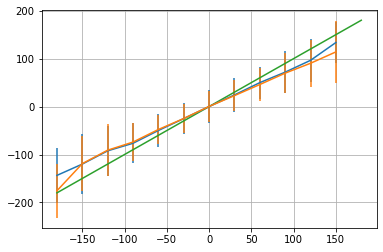

In [9]:
plt.errorbar(np.arange(-180,180,30),dist_dict['head_on'][:,0],yerr=dist_dict['head_on'][:,1])
plt.errorbar(np.arange(-180,180,30),dist_dict['head_off'][:,0],yerr=dist_dict['head_off'][:,1])
plt.plot([-180,180],[-180,180])
plt.grid();

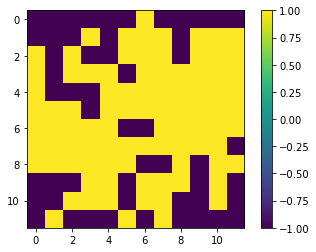

In [15]:
plt.imshow(np.sign(dist_dict['reward_on'][:,:,0]-dist_dict['reward_off'][:,:,0]))
plt.colorbar();

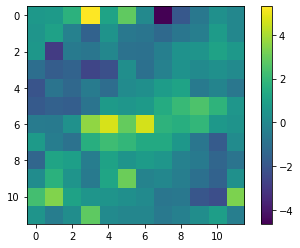

In [16]:
plt.imshow(dist_dict['reward_off'][:,:,0])
plt.colorbar()

In [5]:
# %matplotlib notebook
# from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


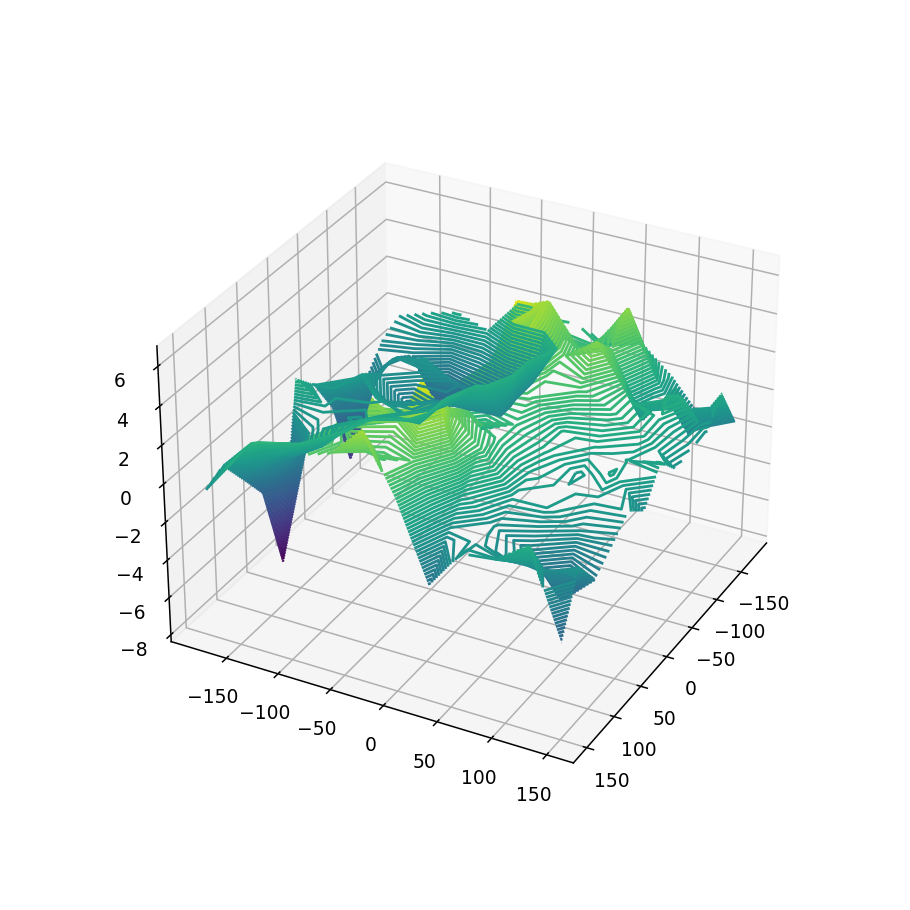

In [22]:
fig=plt.figure()
fig.set_size_inches(5,5)
ax = plt.axes(projection='3d')
zdata = smoothen(dist_dict['reward_on'][:,:,0])#-dist_dict['reward_off'][:,:,0]
xdata = np.arange(-180,180,30)
ydata = xdata
xdata,ydata = np.meshgrid(xdata,ydata)
ax.contour3D(xdata,ydata,zdata,100)

## Matrix smoothing

In [3]:
def smoothen(matrix,counts,smooth_par=.05,iters=30,wraparound=True,diagonals=True):
    # For the reward matrices. 
    # matrix is in form [12,12]
    # counts is [12,12].
    # Will start with a simple linear weighting/smoothing. 
    
    # So the shapes start out right before looping 
    matrix = ut.make_wraparound(matrix, wraparound=True)
    counts = ut.make_wraparound(counts, wraparound=True)
    
    for it in range(iters):
        matrix = ut.make_wraparound(matrix[1:-1,1:-1], wraparound=True)
        tempmat = np.copy(matrix) # Now tempmat and matrix are the same extended size
        rows,cols = np.array(matrix.shape)-2 

        # Loops through each matrix element and weights changes by counts
        for i in np.arange(rows)+1:
            for j in np.arange(cols)+1:
                neighs = np.append(ut.get_neighbors(matrix,(i,j)), matrix[i,j])
                neigh_counts = np.append(ut.get_neighbors(counts,(i,j)), counts[i,j])
                del_sm = np.sum(np.multiply(neigh_counts, neighs))
                if diagonals:
                    # Diagonal entries (scaled by 1/sqrt(2))
                    neighs_d = np.append(ut.get_diags(matrix,(i,j)), matrix[i,j])
                    neighs_counts_d = np.append(ut.get_diags(counts,(i,j)), counts[i,j])
                    del_sm_d = (np.sum(np.multiply(neighs_counts_d, neighs_d)))/np.sqrt(2)
                    Z = np.sum(neigh_counts) + np.sum(neighs_counts_d)/np.sqrt(2)
                else:
                    del_sm_d = 0
                    Z = np.sum(neigh_counts)

                tempmat[i,j] = tempmat[i,j] + smooth_par*(del_sm/Z+del_sm_d/Z - tempmat[i,j])
                
        # After tempmat is updated, set reference matrix to be the same
        # This way updates within one iteration don't get included in the same iteration
        matrix = np.copy(tempmat)
    
    return matrix[1:-1,1:-1]

In [57]:
%matplotlib notebook
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


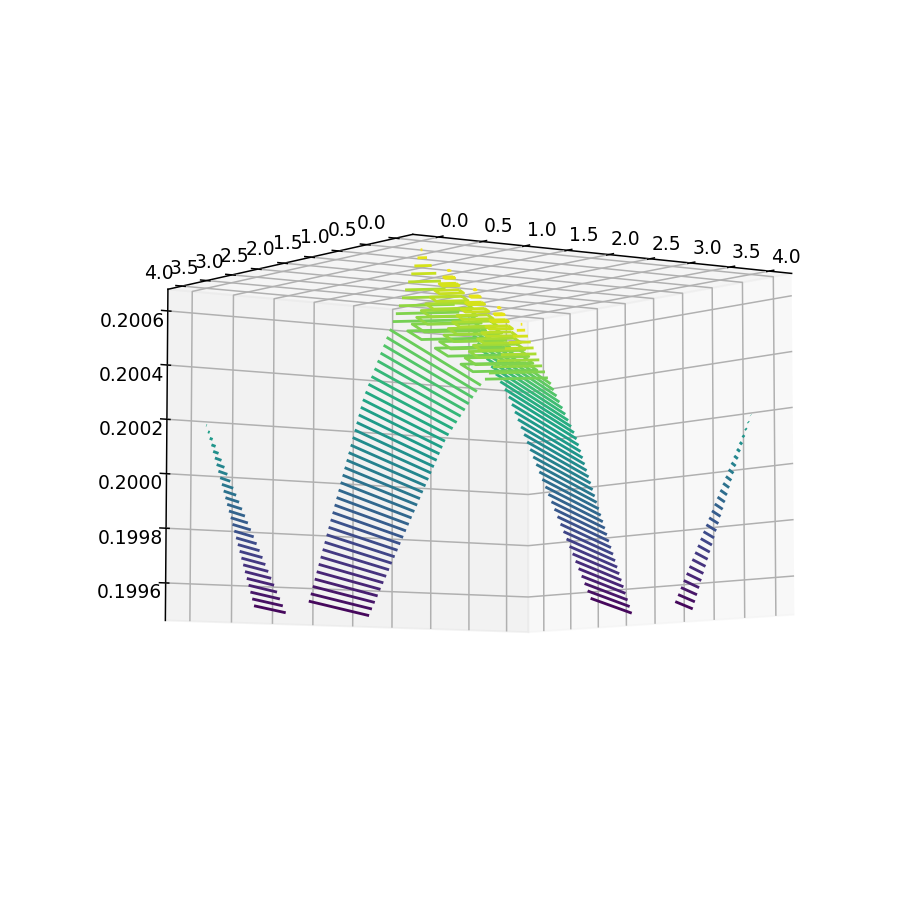

In [97]:
fig=plt.figure()
fig.set_size_inches(5,5)
ax = plt.axes(projection='3d')
zdata = smoothen(x,counts,smooth_par=.1,iters=100)
xdata = np.arange(5)
ydata = xdata
xdata,ydata = np.meshgrid(xdata,ydata)
ax.contour3D(xdata,ydata,zdata,50)

# Testing smoothen() on reward matrices

In [67]:
dist_dict_plain = ut.make_dist_dict(traj_df,smoothenpars={'smooth_par':0,'iters':0})

In [5]:
dist_dict_plain.keys()

dict_keys(['obs_on_bins', 'obs_off_bins', 'body_on', 'body_off', 'head_on', 'head_off', 'reward_on', 'reward_off'])

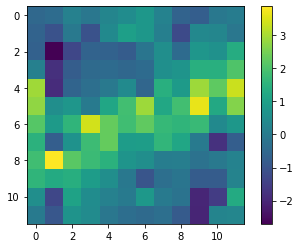

In [68]:
plt.imshow(dist_dict_plain['reward_on'][:,:,0])
plt.colorbar();

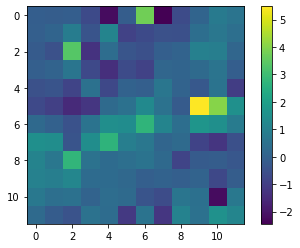

In [69]:
plt.imshow(dist_dict_plain['reward_off'][:,:,0])
plt.colorbar();

<IPython.core.display.Javascript object>


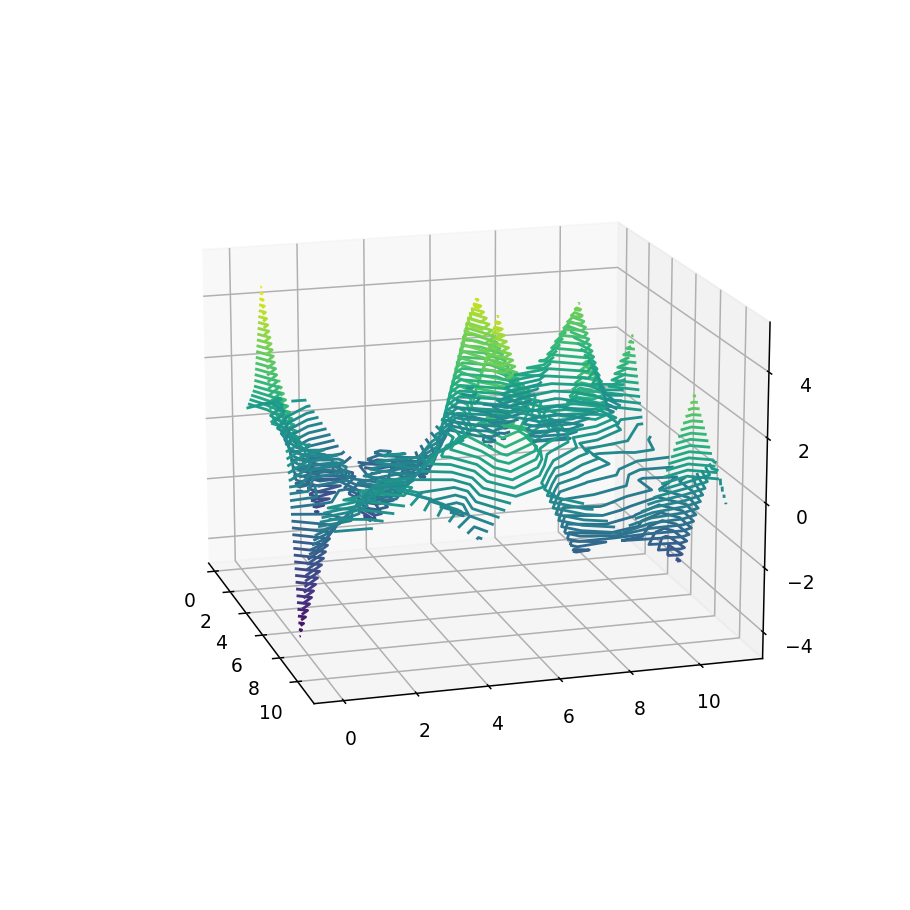

In [11]:
fig=plt.figure()
fig.set_size_inches(5,5)
ax = plt.axes(projection='3d')
zdata = dist_dict_plain['reward_off'][:,:,0]
xdata = np.arange(12)
ydata = xdata
xdata,ydata = np.meshgrid(xdata,ydata)
ax.contour3D(xdata,ydata,zdata,50)

In [96]:
dist_dict_sm = ut.make_dist_dict(traj_df,smoothenpars={'smooth_par':0.05,'iters':30})

<IPython.core.display.Javascript object>


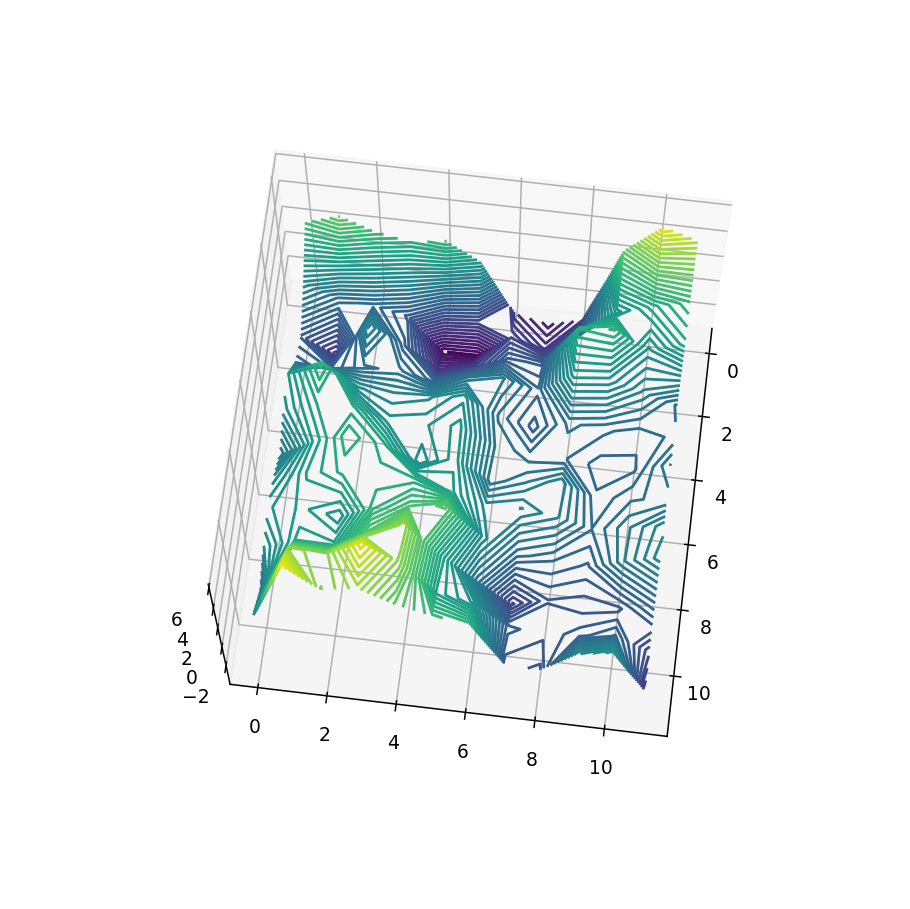

In [58]:
fig=plt.figure()
fig.set_size_inches(5,5)
ax = plt.axes(projection='3d')
zdata = dist_dict_sm['reward_on'][:,:,0]-dist_dict_sm['reward_off'][:,:,0]
xdata = np.arange(12)
ydata = xdata
xdata,ydata = np.meshgrid(xdata,ydata)
ax.contour3D(xdata,ydata,zdata,50)

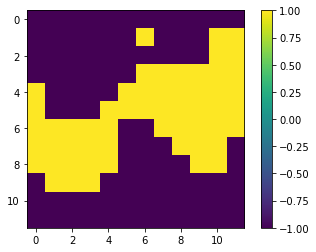

In [20]:
plt.imshow(np.sign(dist_dict_sm['reward_on'][:,:,0]-dist_dict_sm['reward_off'][:,:,0]-.5))
plt.colorbar();
# Smoothing with 50 steps

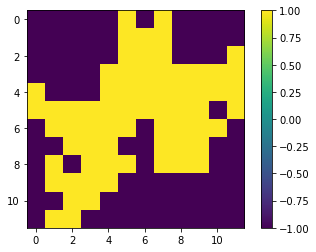

In [101]:
plt.imshow(np.sign(dist_dict_sm['reward_on'][:,:,0]-dist_dict_sm['reward_off'][:,:,0]-.4))
plt.colorbar();

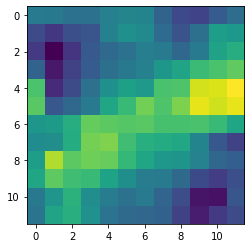

In [97]:
plt.imshow(dist_dict_sm['reward_on'][:,:,0])

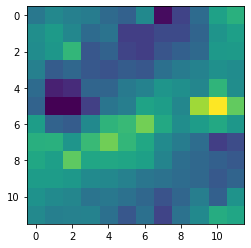

In [98]:
plt.imshow(dist_dict_sm['reward_off'][:,:,0])